In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

C:\Users\Riya\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
sales = pd.read_csv('Sales_Data.csv', parse_dates=['transaction timestamp'])

In [3]:
sales.rename(index=str, columns={'transaction id': 'transID',
                              'product id' : 'prdtID',
                              'product description' : 'description',
                              'quantity sold' : 'quantity',
                              'transaction timestamp' : 'timestamp',
                              'day_name' : 'day',
                              'day_of_month' : 'day_num',
                              'month_of_year' : 'month',
                              'time_of_day(hh:mm:ss)' : 'time',
                              'unit price' : 'price',
                              'customer id' : 'custID',
                              'transaction country' : 'country'}, inplace=True)

In [4]:
columns = ['transID', 'custID', 'prdtID', 'description', 'quantity', 'price', 'country', 'timestamp', 'date', 'day', 'day_num', 'month', 'time']

In [5]:
# convert to lower case
sales['description'] = sales['description'].str.lower()
# remove trailing white spaces
sales['description'] = sales['description'].str.strip()

In [6]:
sales = sales.drop_duplicates()

In [7]:
sales['total_price'] = sales['quantity'] * sales['price']

In [8]:
sales['date'] = sales['timestamp'].apply(lambda x: x.strftime('%d%m%Y'))

In [9]:
sales = sales[sales.quantity > 0]
sales = sales[sales.price > 0]

In [10]:
df = sales.groupby(['date']).sum()

In [11]:
df.drop(columns=['custID','price','day_num'], axis=1, inplace=True)

In [12]:
df.head()

,quantity,total_price
date,,
01022011,15814,29013.29
01032011,12137,26344.68
01042011,18459,25565.64
01052011,3814,6958.11
01062011,10965,20585.19


In [13]:
df.reset_index(inplace=True)

In [14]:
format = '%d%m%Y'

df['date'] = pd.to_datetime(df['date'], format=format)

In [15]:
df.to_csv('temp.csv')

In [16]:
df = pd.read_csv('temp.csv', parse_dates=['date'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   305 non-null    int64         
 1   date         305 non-null    datetime64[ns]
 2   quantity     305 non-null    int64         
 3   total_price  305 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 9.7 KB


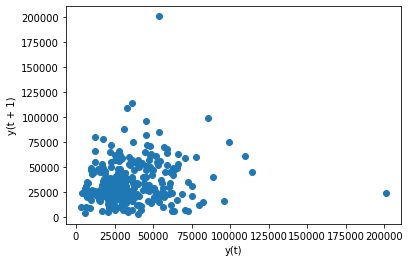

In [18]:
from pandas.plotting import lag_plot

lag_plot(df['total_price'].tail(500))

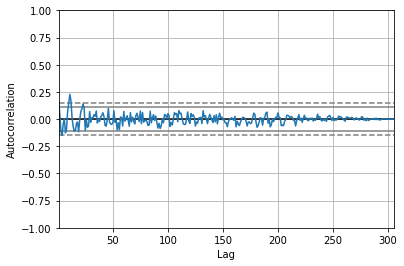

In [19]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df['total_price'])

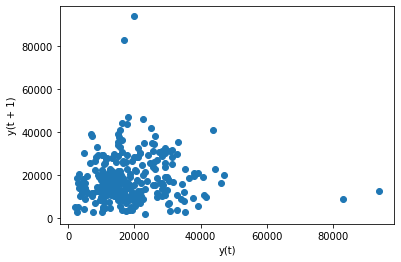

In [20]:
lag_plot(df['quantity'].tail(500))

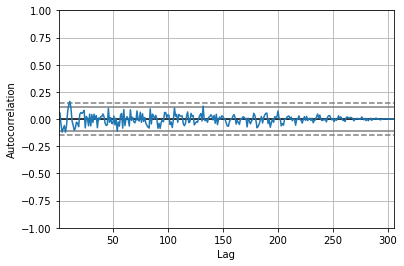

In [21]:
autocorrelation_plot(df['quantity'])

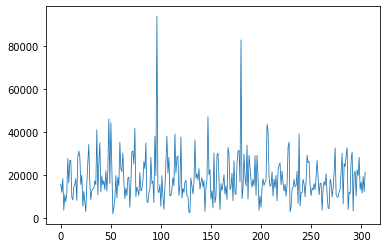

In [22]:
df['quantity'].plot(linewidth=0.8);

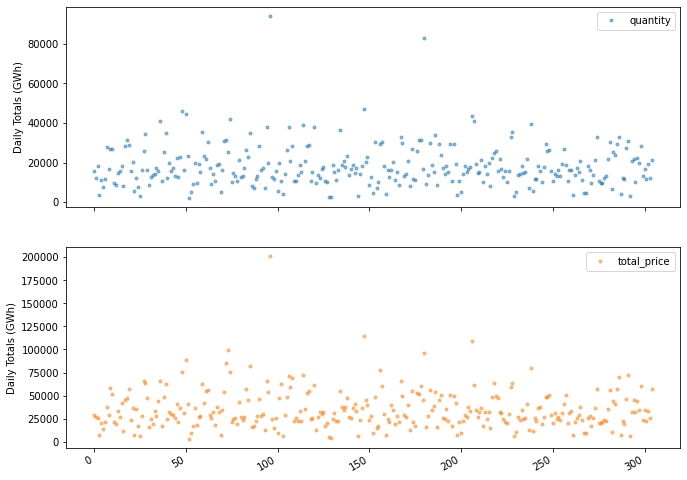

In [23]:
cols_plot = ['quantity', 'total_price']
axes = df[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')

In [24]:
sales['total_price'].sum().resample('m').sum().plot.line()

AttributeError: 'numpy.float64' object has no attribute 'resample'

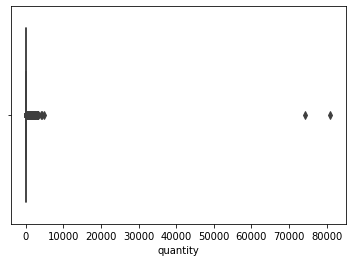

In [25]:
sns.boxplot(x=sales['quantity'])

In [26]:
from sklearn.metrics import mean_absolute_error

In [27]:
def printOutliers(series, window, scale= 1.96, print_outliers=False):

    rolling_mean = series.rolling(window=window).mean()

    #Print indices of outliers
    if print_outliers:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])#mean absolute error is a measure of difference between two continuous variables. 
        deviation = 3*np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        outliers_lower = series[series<lower_bound]
        outliers_upper = series[series>upper_bound]
        print("values beyond lower bound are: " +  "\n"  + str(outliers_lower))
        print("values beyond lower bound are: " + "\n" + str(outliers_upper))  

printOutliers(sales['quantity'].dropna(how='any'), 10, print_outliers=True)

values beyond lower bound are: 
61620      3
61621      4
61622     12
61623     30
61625     24
61626     72
61627     12
61628     20
61629      6
160547    10
160548     5
160549    10
160550    10
160551    10
348326    24
540423    18
540424    12
540425    84
540426    12
540427    12
540428    20
540429    12
540430    12
540431     8
Name: quantity, dtype: int64
values beyond lower bound are: 
4850       1824
4945       2880
4946       1400
6365       1440
19149      1000
          ...  
521375     1500
533812     1404
534952     1440
540070     1500
540421    80995
Name: quantity, Length: 96, dtype: int64


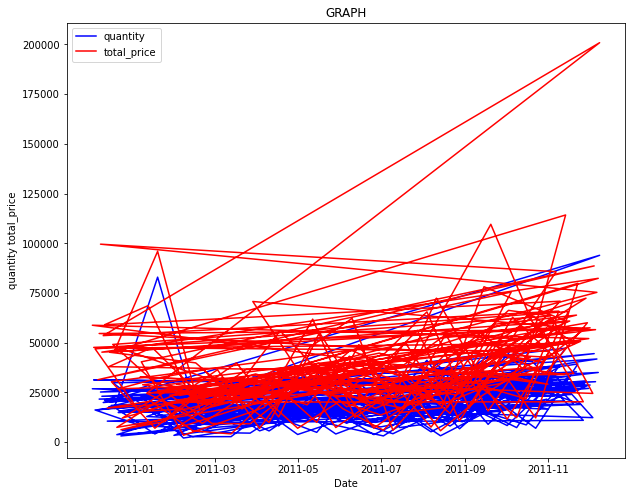

In [28]:
plt.figure(figsize=(10, 8))
plt.plot(df['date'], df['quantity'], 'b-', label = 'quantity')
plt.plot(df['date'], df['total_price'], 'r-', label = 'total_price')
plt.xlabel('Date'); plt.ylabel('quantity total_price'); plt.title('GRAPH')
plt.legend();

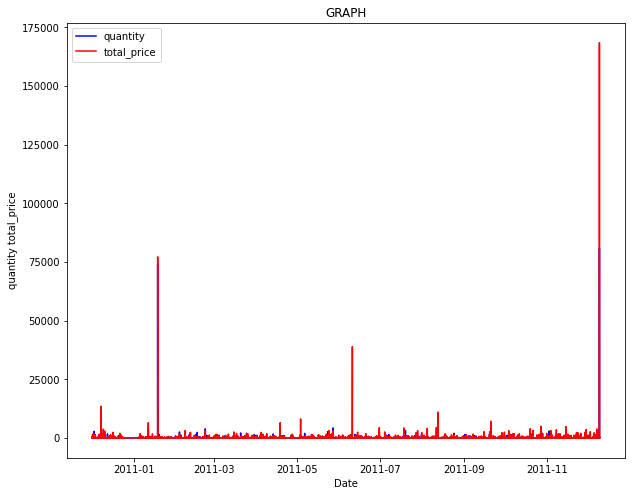

In [29]:
plt.figure(figsize=(10, 8))
plt.plot(sales['timestamp'], sales['quantity'], 'b-', label = 'quantity')
plt.plot(sales['timestamp'], sales['total_price'], 'r-', label = 'total_price')
plt.xlabel('Date'); plt.ylabel('quantity total_price'); plt.title('GRAPH')
plt.legend();

In [43]:
!pip install pandas plotnine

In [44]:
# We run this to suppress various deprecation warnings from plotnine - keeps our notebook cleaner
import warnings
warnings.filterwarnings('ignore')

In [48]:
from plotnine import *

ImportError: cannot import name 'cached_value' from 'statsmodels.tools.decorators' (C:\Users\Riya\Anaconda3\lib\site-packages\statsmodels\tools\decorators.py)